# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier



---
## Step 0: Load The Data

In [12]:
import pickle
import csv
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import tensorflow as tf
from sklearn.utils import shuffle

In [13]:
# Load pickled data

# import pickle
# import csv

# TODO: Fill this in based on where you saved the training and testing data

training_file = './traffic-signs-data/train.p'
validation_file = './traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

#TODO may be I need the names for the the signs
labels_to_names = {}
with open('./signnames.csv') as file:
    all_names = csv.reader(file)
    for name in all_names:
        if name[0] != 'ClassId' :
            labels_to_names[int(name[0])] = name[1]
#         print(name[0])
#     print(len(labels_to_names))
labels_to_names

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go st

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Python, numpy and/or pandas methods used to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [14]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(list(y_train) + list(y_valid) + list(y_test)))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

### Show Images

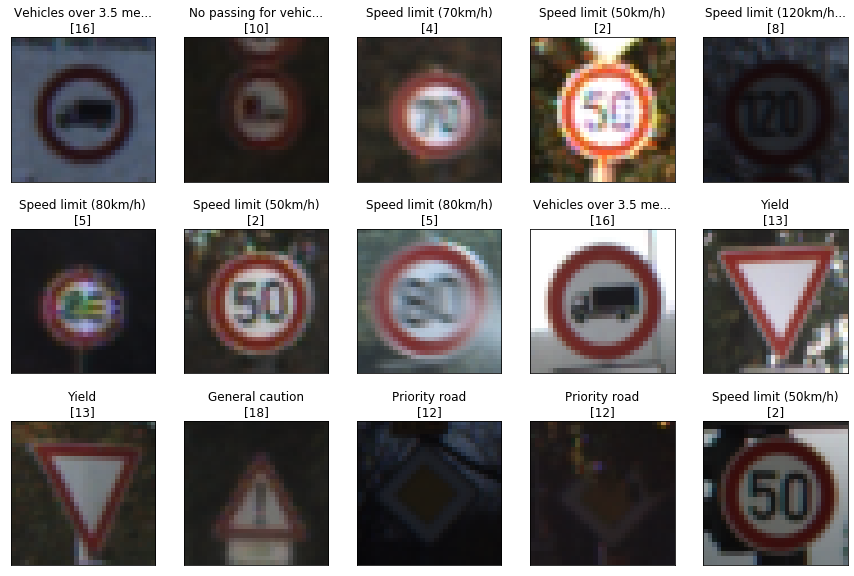

In [15]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline


def show_images(images, labels, l_to_n, rows = 3, columns = 5, fig_size = (15,10)):
    """
    Visualize a random images.
    """
#     size_fig = fig_size
    image_len = len(images)
    assert(image_len == len(labels))
#     image_width, image_height, _ = images[0].shape
    fig, axes = plt.subplots(rows, columns, figsize= fig_size, subplot_kw={'xticks': [], 'yticks': []})
   
    indexes = list(random.randint(0, image_len) for r in range(columns * rows))
    for ax, index in zip(axes.flat, indexes):
        ax.imshow(images[index])
        label = labels[index]
        name = l_to_n[label]
        if len(name) > 20:
            name = name[:20] + '...'
        ax.set_title("{0}\n[{1}]".format(name, label))
#         ax.set_title("{0}\n[{1}][{2}]".format(name, label, index))
show_images(X_train, y_train, labels_to_names, rows = 3, columns = 5)

### Draw Labels Histogram

/home/lenovo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


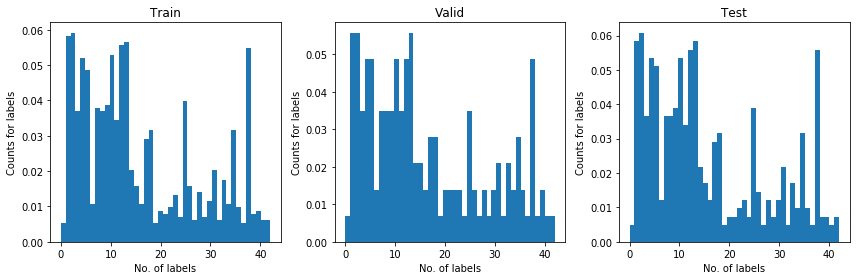

In [16]:
def histogram(labels, titles, labels_number):
    """
    Plot the histogram of the all the labels.
    """
    n_cols = len(labels)    
    fig, axes = plt.subplots(ncols = n_cols, figsize = (12, 4))
    for ax, label, title in zip(axes, labels, titles):        
        _, bins, patches = ax.hist(label, labels_number, normed = 1)
        ax.set_xlabel('No. of labels')
        ax.set_ylabel('Counts for labels')
        ax.set_title(title)
        
    fig.tight_layout()
    plt.show()
    
histogram([y_train, y_valid, y_test], ['Train', 'Valid', 'Test'], n_classes)

## Data Augmentation

Text(0.5, 1.0, 'Rotate')

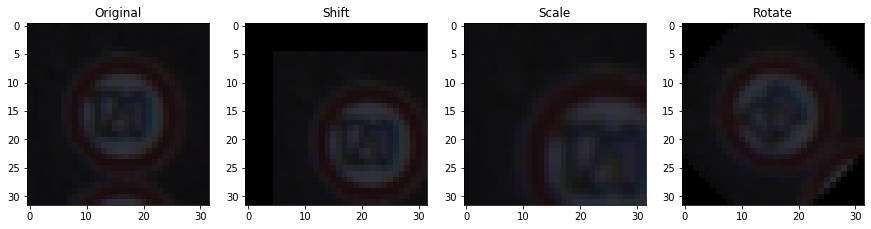

In [17]:
# import cv2  

def image_process(image, process = 0):
    """
    Applying image processing like scale, transform, and translation.
    We need it when the training data is complex and have a few samples.
    """
    # Scale
    if process == 1:
        fx = 1.5; fy = 1.5
        return cv2.resize(image,None,fx=fx, fy=fy, interpolation = cv2.INTER_CUBIC)[0:32, 0:32,:]
    # Translation
    if process == 0: 
        X = 5; Y = 5
        P = np.float32([[1,0,Y],[0,1,X]])
    else:
        angle = 45
        P = cv2.getRotationMatrix2D((16,16),angle,1)
    
    return cv2.warpAffine(image,P,(32,32))

fig, axes = plt.subplots(ncols = 4, figsize = (15,13))
index = random.randint(0, len(X_train))
# index = 25
axes[0].imshow(X_train[index])
axes[0].set_title('Original')
axes[1].imshow(image_process(X_train[index], 0))
axes[1].set_title('Shift')
axes[2].imshow(image_process(X_train[index], 1))
axes[2].set_title('Scale')
axes[3].imshow(image_process(X_train[index], 2))
axes[3].set_title('Rotate')

## Train augmented images

/home/lenovo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


Number of images 69651


/home/lenovo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


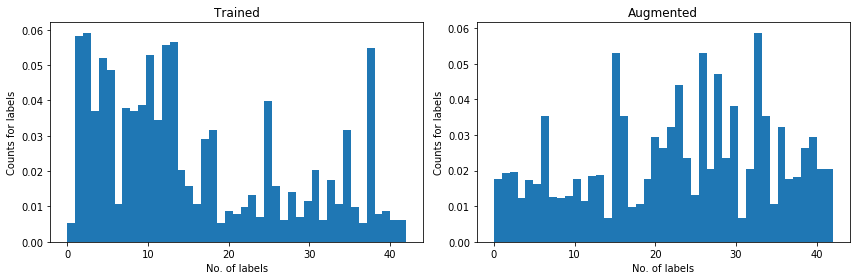

In [18]:
def gen_images(images, input_labels):
    hist, _ = np.histogram(input_labels, 43, normed=True)
    select_label = []
    for index, value in enumerate(hist):
        if value < 0.02:
            select_label.append(index)
    xtrain = []
    ytrain = []
    for index, label in enumerate(input_labels):
        if label in select_label:
            for i in range(0,9):
                type = random.randint(0, 3)
                ytrain.append(label)
                xtrain.append(image_process(images[index], type))
    
    return (np.array(xtrain), np.array(ytrain))

X_train_new, y_train_new = gen_images(X_train, y_train)
print('Number of images {}'.format(len(X_train_new)))
added = np.concatenate((y_train, y_train_new), axis=0)
histogram([y_train, added], ['Trained', 'Augmented'], n_classes)
X_train = np.concatenate((X_train, X_train_new), axis=0)
y_train = np.concatenate((y_train, y_train_new), axis=0)

### ----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

## Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [75]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.

### Normalization

In [8]:
# def get_normalize(image):
#     output = np.zeros((len(image), 32, 32, 3), np.float64)
#     return ((image - np.mean(image))/ np.std(image))

# Simple normalization
# import numpy as np
# a = np.zeros((156816, 36, 53806), dtype='uint8')
# a.nbytes

# def get_normalize(input):    
#     """
#     Normalize the input images
#     """
#     output = np.zeros((len(input), 32, 32, 3), np.float64)
#     for index, image in enumerate(input):
#         output[index] = (image.astype(np.float64) - 128)/128
#     return output
    
# X_train_normalized = get_normalize(X_train)
# X_valid_normalized = get_normalize(X_valid)
# X_test_normalized = get_normalize(X_test)

# normalized_images = { \
#                      "input"      : X_train_normalized, "labels"      : y_train, \
#                      "valid_input": X_valid_normalized, "valid_labels": y_valid, \
#                      "test_input" : X_test_normalized, "test_labels"  : y_test
#                    }

### Grayscale

In [9]:
# def get_gray(image):
#     return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# import numpy as np
# from sklearn.utils import shuffle

# def to_gray(images):
#     output = np.zeros((len(images), 32, 32, 3), np.float64)
#     for index, img in enumerate(images):
#         g_image = cv2.cvtColor(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), cv2.COLOR_GRAY2RGB)
#         output[index] = (g_image.astype(np.float64) - 128)/128
#     return output



# X_train, y_train = shuffle(X_train, y_train)
# X_train = to_gray(X_train)
# X_valid = to_gray(X_valid)
# X_test = to_gray(X_test)

# plt.imshow(X_train[1])

### Equalize histogram

In [10]:
# def get_equalize(image):
#     return cv2.equalizeHist(image)

# def get_equalize(input):
#     """
#     Equalize the input images
#     """
#     output = input.copy()
#     for index, image in enumerate(output):
#         image_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
#         image_yuv[:,:,0] = cv2.equalizeHist(image_yuv[:,:,0])
#         output[index] = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2BGR)
    
#     return output

# X_train_equalized = get_normalize(get_equalize(X_train))
# X_valid_equalized = get_normalize(get_equalize(X_valid))
# X_test_equalized   = get_normalize(get_equalize(X_test))

# equalized_images = { \
#                      "input"      : X_train_equalized, "labels"      : y_train, \
#                      "valid_input": X_valid_equalized, "valid_labels": y_valid, \
#                      "test_input" : X_test_equalized, "test_labels"  : y_test
#                    }

In [20]:
# def get_normalize(image):
#     output = np.zeros((len(image), 32, 32, 3), np.float64)
#     return ((image - np.mean(image))/ np.std(image))

# def get_gray(image):
#     return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# def pre_process(images, labels):
#     gray_images = list(map(get_gray, images))
# #     eq_imgs = list(map(clahe, gray_imgs))
#     normalized_images = list(map(get_normalize, gray_images))
#     x_images, x_labels = shuffle(normalized_images, labels)
#     return x_images, x_labels

def pre_process(images):
    output = np.zeros((len(images), 32, 32, 3), np.float64)
    for index, img in enumerate(images):
        gray = cv2.cvtColor(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), cv2.COLOR_GRAY2RGB)
#         output[index] = (gray.astype(np.float64) - 128) / 128
         #To normalize to the [0,1] range you should not use the mean and standard deviation,
         #but the maximum and the minimum, 
        output[index] = np.array((gray - np.min(gray)) / (np.max(gray) - np.min(gray)))
    return output

In [ ]:
X_train, y_train = shuffle(X_train, y_train)
X_train = pre_process(X_train)
X_valid = pre_process(X_valid)
X_test = pre_process(X_test)

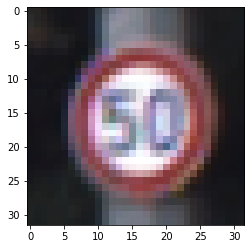

In [33]:
fig, axes = plt.subplots(ncols = 4, figsize = (15,13))
index = random.randint(0, len(X_train))
axes[0].imshow(X_train[index + 1])
axes[0].set_title(labels_to_names[y_train[index + 1]])
axes[1].imshow(X_train[index + 2])
axes[1].set_title(labels_to_names[y_train[index + 2]])
axes[2].imshow(X_train[index + 3])
axes[2].set_title(labels_to_names[y_train[index + 3]])
axes[3].imshow(X_train[index + 4])
axes[3].set_title(labels_to_names[y_train[index + 4]])

### Model Architecture

In [83]:
### Define your architecture here.
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle

WARNING: The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md

In [18]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.

def LeNet(x, mu = 0, sigma = 0.1, use_dropout = False): 
    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
        
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.  6 => 16
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 16), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(16))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x16. Output = 14x14x16.  6 => 16
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x64.  Input 6 => 16  Output 16 => 64
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x64. Output = 5x5x64.  16 => 64
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x64. Output = 400.  16 => 64    400 => 1600
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 1600. Output = 120. 400 => 1600  120 => 240
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1600, 240), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(240))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b    
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.  120 => 240
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(240, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
                        
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return (logits, conv1, conv2, fc1, fc2)

In [19]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [20]:
EPOCHS = 40
BATCH_SIZE = 128
rate = 1e-3
model_location = './traffic_sign_model'
trained_flag = True

In [ ]:
logits, conv1, conv2, fc1, fc2 = LeNet(x, use_dropout = False)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [24]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data, prob = 0.0):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:prob})
        loss = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:prob})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples, loss

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

In [ ]:
# epoch_validation = np.zeros((EPOCHS), dtype = np.float64)
test_accuracy = 0.0
train_accu_array = []
train_loss_array = []
valid_accu_array = []
valid_loss_array = []
loss_train = 0.0
accu_train = 0.0
if trained_flag:
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)
        validation_accuracy = 0.0
        print("Training...")
        for i in range(EPOCHS):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.8})
                accu_train = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.8})
                loss_train = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.8})
                     
            validation_accuracy, validation_loss = evaluate(X_valid, y_valid, prob = 1.0)
            train_accu_array.append(accu_train)
            train_loss_array.append(loss_train)
            valid_accu_array.append(validation_accuracy)
            valid_loss_array.append(validation_loss)
#             epoch_validation[i] = validation_accuracy
            print("EPOCH {} ...".format(i+1))
            print('Accuracy: Validation: {:.3f}'.format(validation_accuracy))
            print()
        train_accuracy, _ = evaluate(X_train, y_train, prob = 1.0)
        test_accuracy, _ = evaluate(X_test, y_test, prob = 1.0)
        print('Training finished')
        print('Accuracy: Train: {:.3f}, Validation: {:.3f}, Test: {:.3f}'\
                .format(train_accuracy, validation_accuracy, test_accuracy))
        saver.save(sess, model_location)
        trained_flag = True
        print("Model saved")
else:
    print('No training configured')

Training...


In [ ]:
if trained_flag:
#     fig, axes = plt.subplots(figsize=(6, 4))
#     axes.plot(range(1, EPOCHS + 1), valid_accu_array)
#     axes.set_xlabel('Epochs')
#     axes.set_ylabel('Accuracy')
#     axes.grid(True)
    fig, axes = plt.subplots(ncols = 3, figsize=(20, 6))
    axes[0].plot(range(1, EPOCHS + 1), valid_accu_array)
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Accuracy')
    axes[0].grid(True)
    axes[1].plot(train_accu_array, color='red',  label='Train')
    axes[1].plot(valid_accu_array, color='blue', label='Valid')
    axes[1].set_title('Accuracy')
    axes[1].legend(loc='best')
    axes[1].grid(True)
    axes[2].plot(train_loss_array, color='red',  label='Train')
    axes[2].plot(valid_loss_array, color='blue', label='Valid')
    axes[2].set_title('Loss')
    axes[2].legend(loc='best')
    axes[2].grid(True)
else:
    print('Error: Train not exist')

---

## Step 3: Test a Model on New Images

I downloaded five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

`signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
import numpy as np
import cv2
import os
%matplotlib inline
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [ ]:
images_dir = 'web_images'
images_names = glob.glob('web_images/*.jpg')
web_images = [ mpimg.imread('./' + image_name ) for image_name in images_names ]

In [ ]:
fig, axes = plt.subplots(ncols=len(web_images), figsize=(16, 8))
for ax, image, image_name in zip(axes, web_images, images_names):
    ax.imshow(image)
    ax.set_title(image_name)

In [ ]:
X_web_images = pre_process(web_images)

In [ ]:
fig, axes = plt.subplots(ncols=len(web_images), figsize=(16, 8))
for ax, image, image_name in zip(axes, X_web_images, images_names):
    ax.imshow(image)
    ax.set_title(image_name)

### Predict the Sign Type for Each Image

In [3]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
with tf.Session() as sess:
    saver.restore(sess, model_location)
    web_classes = sess.run(logits, feed_dict={x: X_web_images, keep_prob : 1.0})
    web_softmax = sess.run(tf.nn.softmax(logits), feed_dict={x: X_web_images, keep_prob : 1.0})

In [ ]:
def plt_show(classes, names):
    
    num_cols = len(classes)
    assert(num_cols == len(names))
    
    fig, axes = plt.subplots(ncols = num_cols, figsize=(20, 4))
    for ax, a_class, title in zip(axes, classes, names):        
        ax.bar(range(0,43), a_class)
        ax.set_xlabel('histo.')
        ax.set_ylabel('count')
        ax.set_title(title)
        ax.grid(True)
        
    fig.tight_layout()
    plt.show()

plt_show(web_classes, images_names)

In [ ]:
with tf.Session() as sess:
    pred_images = sess.run(tf.nn.top_k(web_softmax, k = 5, sorted = True))
    
names_pred = [labels_to_names[pred_images[1][i][0]] for i in range(0, len(images_names))]

In [ ]:
fig, axes = plt.subplots(ncols = len(web_images), figsize = (16, 8))
for ax, image, image_name, pred_name in zip(axes, web_images, images_names, names_pred):
    indx = pred_images[1][1]
    ax.imshow(image)
    ax.set_title('{} \n {}'.format(image_name, pred_name))

### Analyze Performance

#### The model predicted 4 out of 5 signs correctly, 80% accuracy

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [3]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 

for i in range(len(pred_images[0])):
    print('Image: ' + images_names[i])
    print('Prob.:')
    for j in range(0, len(pred_images[0][i])):
        prob = pred_images[0][i][j]
        indx = pred_images[1][i][j]
        name = labels_to_names[indx]
        print('   {:.6f} : {} - {}'.format(prob, indx, name))
    print()

### Project Writeup

To document the results in a project writeup use this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> To finalize the work, export the iPython Notebook as an HTML document. To do that, use the menu above and navigating to

> **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, model_location)
    print("First layer: conv1")
    outputFeatureMap(X_web_images, conv1)

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, model_location)
    web_classes = sess.run(logits, feed_dict={x: X_web_images, keep_prob : 1.0})
    print("Second layer: conv2")
    outputFeatureMap(X_web_images, conv2)